In [1]:
import numpy as np
from numpy import random as rd
from scipy import interpolate
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
fname = '/Users/shohei/Desktop/Shohei/Fresnel/Detector/Paper'

# データの取得

In [3]:
lamb = np.load('{}/Data/lamb_proceeding.npy'.format(fname))

In [5]:
df_spectrum = pd.read_csv('{}/Data/primary_spectra_proceeding.csv'.format(fname))

sub_eva = np.load('{}/Simulation/Primary/sub_evaluation_primary_proceeding.npy'.format(fname))
sub_sig = np.load('{}/Simulation/Primary/sub_sigma_primary_proceeding.npy'.format(fname))

# データの修正

In [6]:
def Gauss(eva, sig, num):
    # systematic errorの平均値と分散値でガウス分布する値を作成
    eva_mean = np.mean(eva, axis=0)
    eva_std = np.std(eva, axis=0)
    systematic = rd.normal(eva_mean, eva_std)

    # random noiseの平均値と分散値でガウス分布する値を作成
    sig_mean = np.mean(sig, axis=0)
    sig_std = np.std(sig, axis=0)
    random = rd.normal(sig_mean, sig_std)
    
    return systematic, random

In [7]:
sub_sys, sub_rand = Gauss(sub_eva, sub_sig, len(sub_eva))

In [8]:
sub_eva_std = np.std(sub_eva, axis=0)

In [10]:
# 横軸を波長と合わせたspectrumを作成
raw_spectrum = np.array([df_spectrum[temp].values for temp in ['2500K', '3000K']])*10**6
func = [interpolate.interp1d(df_spectrum.wavelength.values, raw_spectrum[T], kind='cubic') for T in range(2)]
spectrum = [func[T](lamb) for T in range(2)]

# グラフ化

In [16]:
# 地球大気の吸収スペクトルに補正後のデータを載せた図を作成
def Spectrum(i, T, x, y, y_sys, y_err):
    sys_error = y[T]+y_sys[T]
    plt.subplot(i)
    plt.plot(x, y[T], c='r', linewidth = 2.0)
    plt.plot(x, sys_error, 'ro', c='g', markersize=4.0)
    plt.errorbar(x, sys_error, yerr=y_err[T], fmt='ro', markersize=0.0, ecolor='k')
    plt.xlabel('Wavelength [μm]')
    plt.ylabel('Transit depth [ppm]')
    plt.xlim(6, 25)

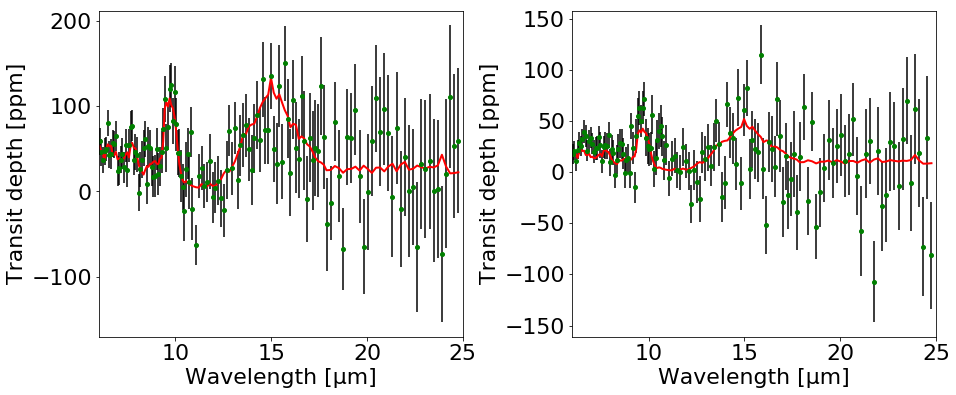

In [27]:
plt.figure(figsize=(15, 6))
plt.rcParams['font.size'] = 22
rd.seed()
Spectrum(121, 0, lamb, spectrum, sub_eva[rd.choice(np.arange(100))], sub_sig[rd.choice(np.arange(100))])
Spectrum(122, 1, lamb, spectrum, sub_eva[rd.choice(np.arange(100))], sub_sig[rd.choice(np.arange(100))])
plt.subplots_adjust(hspace=0.25, wspace=0.3)
plt.show()